In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append("../radarchart/")
from radarchart import Radar

In [2]:
pd.options.display.float_format = '{:.4f}'.format

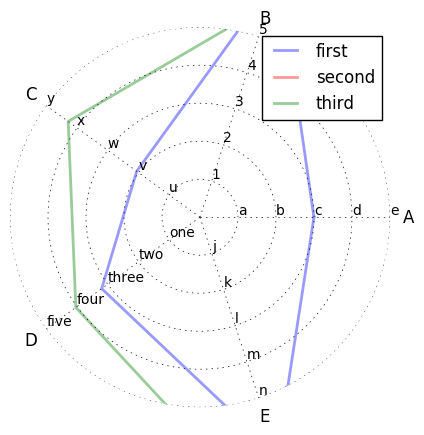

In [3]:
def random_series(n):
    return [np.random.rand()+np.random.randint(low=1, high=10) for _ in range(n)]

def calc_limits_and_scale(values):
    ymin, ymax = (min(values), max(values))
    limits = ymin, ymax
    mean = np.mean(values)
    return limits, mean

a = random_series(5)
b = random_series(5)
c = random_series(5)

fig = plt.figure(figsize=(4, 4))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot(a,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot(b,"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot(c, "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()
plt.show()

### no scaling or normalization

### normalization

In [4]:
from sklearn import preprocessing

In [5]:
def normalize(values):
    values = np.array(values)
    if len(values.shape)==1:
        values = values.reshape(1,-1)
    values = preprocessing.normalize(values)
    values = values + 1
    return values.flatten().tolist()

[1.2833769759149658, 1.635742598512116, 1.1945503016870251, 1.3021632490892145, 1.6215918186170797]
[1.3848843333197034, 1.4067467664247089, 1.5562914126607825, 1.4198596692179932, 1.4479719191334648]
[1.5640232122567053, 1.3843187367539531, 1.2793278141689726, 1.2630645546252115, 1.6220530017184196]



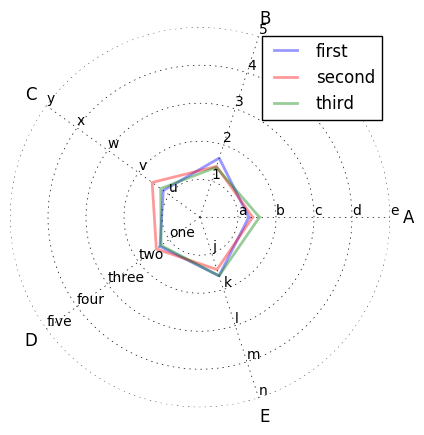

In [8]:
a_norm = normalize(a)
b_norm = normalize(b)
c_norm = normalize(c)

print a_norm
print b_norm
print c_norm
print

fig = plt.figure(figsize=(4, 4))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot(a_norm,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot(b_norm,"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot(c_norm, "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()
plt.show()

### scaling

In [48]:
def make_labels(values, n):
    scale_range = np.linspace(min(values), max(values), n)
    labels = [['{:.2f}'.format(value) for value in sublist] 
                  for sublist in [scale_range for _ in range(len(scale_range))]]
    return labels

['1.00', '2.00', '3.00', '4.00', '5.00']


[1.8053329567823877, 5.000000000000001, 1.0, 1.9756557236070902, 4.871704197948442]
[1.0, 1.5101874015717147, 5.0, 1.8161934975554423, 2.472228242993971]
[4.353407721818441, 2.351065006248059, 1.1812120660199223, 1.0, 5.0]

1.0
5.0


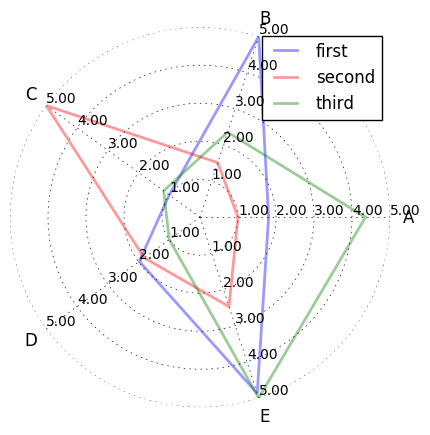

In [52]:
def scale(values):
    scaled_values = preprocessing.minmax_scale(values, feature_range=(1,len(values)))
    return (scaled_values).tolist()

a_scale = scale(a)
b_scale = scale(b)
c_scale = scale(c)

print a_scale
print b_scale
print c_scale
print 

fig = plt.figure(figsize=(4, 4))

titles = ['A', 'B', 'C', 'D','E']

labels = make_labels(a_scale+b_scale+c_scale, 5)


radar = Radar(fig, titles, labels)
radar.plot(a_scale,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot(b_scale,"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot(c_scale, "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()
plt.show()

array([ 1.        ,  1.28571429,  1.57142857,  1.85714286,  2.14285714,
        2.42857143,  2.71428571,  3.        ,  3.28571429,  3.57142857,
        3.85714286,  4.14285714,  4.42857143,  4.71428571,  5.        ])